In [89]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
sns.set()

from sklearn.metrics import mean_squared_error
from math import sqrt
from statistics import mean 

import warnings
warnings.filterwarnings("ignore")

In [4]:
# List of CSV file names to be combined
csv_files = ['PUB_Demand_2005_v1.csv', 'PUB_Demand_2006_v1.csv', 'PUB_Demand_2007_v1.csv', 'PUB_Demand_2008_v1.csv', 'PUB_Demand_2009_v1.csv', 
             'PUB_Demand_2010_v1.csv', 'PUB_Demand_2011_v1.csv', 'PUB_Demand_2012_v1.csv', 'PUB_Demand_2013_v1.csv', 'PUB_Demand_2014_v1.csv', 
             'PUB_Demand_2015_v1.csv', 'PUB_Demand_2016_v1.csv', 'PUB_Demand_2017_v1.csv', 'PUB_Demand_2018_v253.csv', 'PUB_Demand_2019_v395.csv',
            'PUB_Demand_2020_v396.csv', 'PUB_Demand_2021_v396(1).csv']

# Initialize an empty DataFrame to store combined data
combined_data = pd.DataFrame()

# Loop through each CSV file and read it into a DataFrame, then concatenate it to the combined_data DataFrame
for file in csv_files:
    file_path = file  # Update the file path if the CSV files are stored in a different directory
    df = pd.read_csv(file_path)
    combined_data = pd.concat([combined_data, df], ignore_index=True)

# Write the combined data to a new CSV file
combined_data.to_csv('combined_data.csv', index=False)


In [17]:
data = pd.read_csv(r'C:\Users\SENANU\Documents\EEM\Semester 3\Ontario Data\Historical Electicity demand\.ipynb_checkpoints\combined_data.csv')
data.shape

(149016, 4)

In [18]:
data.columns

Index(['Date', 'Hour', 'Market Demand', 'Ontario Demand'], dtype='object')

In [19]:
# Check for any "NA" values in the entire dataset
data_na = data.isna().sum()

if data_na.sum() > 0:
    print("The dataset contains NA values.")
    print("Total count of NA values for each column:")
    print(data_na)
    
else:
    print("The dataset does not contain any NA values.")


The dataset does not contain any NA values.


In [20]:
# Use the isna() function to create a boolean DataFrame with True where NA values are present
na_locations = data.isna()

# Use the any() function to check if there are any NA values in the entire DataFrame
if na_locations.any().any():
    print("The DataFrame contains NA values.")

    # Use the .iterrows() function to iterate through the rows of the boolean DataFrame
    for index, row in na_locations.iterrows():
        # Use the .index attribute to get the column names where NA values are present in each row
        na_columns = row.index[row].tolist()
        if na_columns:
            print(f"Row {index} contains NA values in column(s): {', '.join(na_columns)}")
else:
    print("The DataFrame does not contain any NA values.")



The DataFrame does not contain any NA values.


In [21]:
data.dtypes

Date              object
Hour               int64
Market Demand      int64
Ontario Demand     int64
dtype: object

In [22]:
data.head()


,Date,Hour,Market Demand,Ontario Demand
0,01/01/2005,1,16672,15016
1,01/01/2005,2,16262,14470
2,01/01/2005,3,16043,14015
3,01/01/2005,4,15192,13622
4,01/01/2005,5,14911,13545


### Required Preprocessing

In [23]:
data['Date'] = pd.to_datetime(data['Date'], format= '%d/%m/%Y')
data.dtypes


Date              datetime64[ns]
Hour                       int64
Market Demand              int64
Ontario Demand             int64
dtype: object

In [24]:
data.head()

,Date,Hour,Market Demand,Ontario Demand
0,2005-01-01,1,16672,15016
1,2005-01-01,2,16262,14470
2,2005-01-01,3,16043,14015
3,2005-01-01,4,15192,13622
4,2005-01-01,5,14911,13545


In [25]:
data.index  

RangeIndex(start=0, stop=149016, step=1)

In [26]:
data.head()

,Date,Hour,Market Demand,Ontario Demand
0,2005-01-01,1,16672,15016
1,2005-01-01,2,16262,14470
2,2005-01-01,3,16043,14015
3,2005-01-01,4,15192,13622
4,2005-01-01,5,14911,13545


In [27]:
data.Date.min(), data.Date.max()

(Timestamp('2005-01-01 00:00:00'), Timestamp('2021-12-31 00:00:00'))

In [28]:
data.index = data['Date']
#data.drop(['Date'],axis=1,inplace=True)
data.head()

,Date,Hour,Market Demand,Ontario Demand
Date,,,,
2005-01-01,2005-01-01,1,16672,15016
2005-01-01,2005-01-01,2,16262,14470
2005-01-01,2005-01-01,3,16043,14015
2005-01-01,2005-01-01,4,15192,13622
2005-01-01,2005-01-01,5,14911,13545


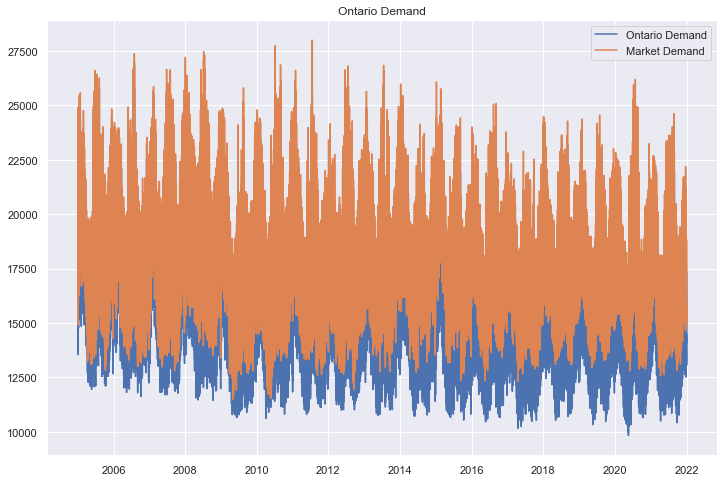

In [29]:
plt.figure(figsize=(12,8))

plt.plot(data.index, data['Ontario Demand'], label='Ontario Demand')
plt.plot(data.index, data['Market Demand'], label='Market Demand')
plt.legend(loc='best')
plt.title("Ontario Demand")
plt.show()

Text(0.5, 1.0, 'Market Demand Demand')

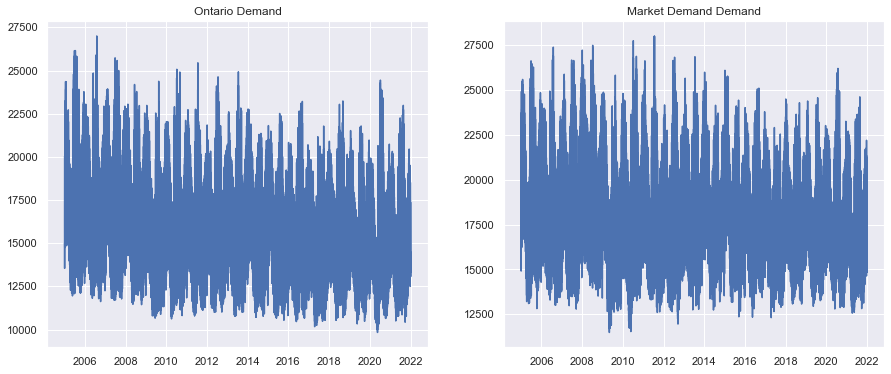

In [30]:
# create 2 plots
#ax1 = plt.plot(data.index, data['Ontario Demand'], label='Ontario Demand')
#ax2 = plt.plot(data.index, data['Market Demand'], label='Market Demand')


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,6), sharex=True, sharey=False)

# plot on 0 row and 0 column
ax[0].plot(data['Ontario Demand'])

# plot on 0 row and 1 column
ax[1].plot(data['Market Demand'])

# set titles for subplots
ax[0].set_title("Ontario Demand")
ax[1].set_title("Market Demand Demand")



### Adding features to the dataset 

In [31]:
data.index.year


Int64Index([2005, 2005, 2005, 2005, 2005, 2005, 2005, 2005, 2005, 2005,
            ...
            2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021],
           dtype='int64', name='Date', length=149016)

In [32]:
data.head()

,Date,Hour,Market Demand,Ontario Demand
Date,,,,
2005-01-01,2005-01-01,1,16672,15016
2005-01-01,2005-01-01,2,16262,14470
2005-01-01,2005-01-01,3,16043,14015
2005-01-01,2005-01-01,4,15192,13622
2005-01-01,2005-01-01,5,14911,13545


In [33]:
data_feat = pd.DataFrame({"year": data['Date'].dt.year,
                          "month": data['Date'].dt.month,
                          "day": data['Date'].dt.day,
                          "dayofyear": data['Date'].dt.dayofyear,
                          "week": data['Date'].dt.week,
                          "weekday": data['Date'].dt.dayofweek,
                          "quarter": data['Date'].dt.quarter,
                         })
data_feat.head()

,year,month,day,dayofyear,week,weekday,quarter
Date,,,,,,,
2005-01-01,2005,1,1,1,53,5,1
2005-01-01,2005,1,1,1,53,5,1
2005-01-01,2005,1,1,1,53,5,1
2005-01-01,2005,1,1,1,53,5,1
2005-01-01,2005,1,1,1,53,5,1


In [34]:
complete_data = pd.concat([data ,data_feat], axis=1)
complete_data.head()

,Date,Hour,Market Demand,Ontario Demand,year,month,day,dayofyear,week,weekday,quarter
Date,,,,,,,,,,,
2005-01-01,2005-01-01,1,16672,15016,2005,1,1,1,53,5,1
2005-01-01,2005-01-01,2,16262,14470,2005,1,1,1,53,5,1
2005-01-01,2005-01-01,3,16043,14015,2005,1,1,1,53,5,1
2005-01-01,2005-01-01,4,15192,13622,2005,1,1,1,53,5,1
2005-01-01,2005-01-01,5,14911,13545,2005,1,1,1,53,5,1


### Ploting Data for trends

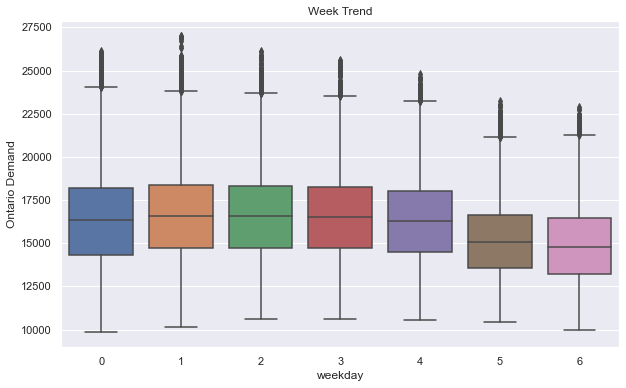

In [35]:
# boxplot for week's count
plt.figure(figsize=(10,6))

sns.boxplot(x=complete_data['weekday'], y=complete_data['Ontario Demand'], )
plt.title('Week Trend')
plt.show()

- The count is lower on the weekends (saturday and sunday)
- Average count is higher on the weekdays

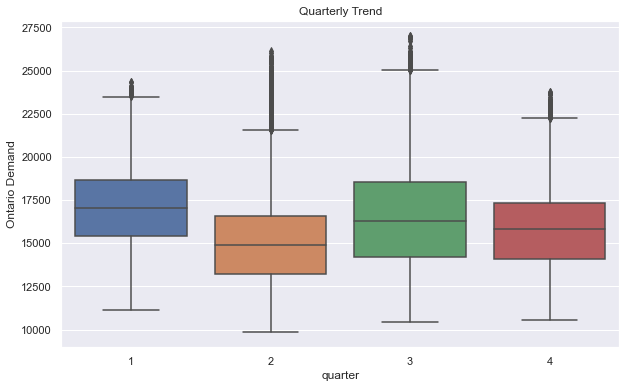

In [36]:
# boxplot for week's count
plt.figure(figsize=(10,6))

sns.boxplot(x=complete_data['quarter'], y=complete_data['Ontario Demand'], )
plt.title('Quarterly Trend')
plt.show()

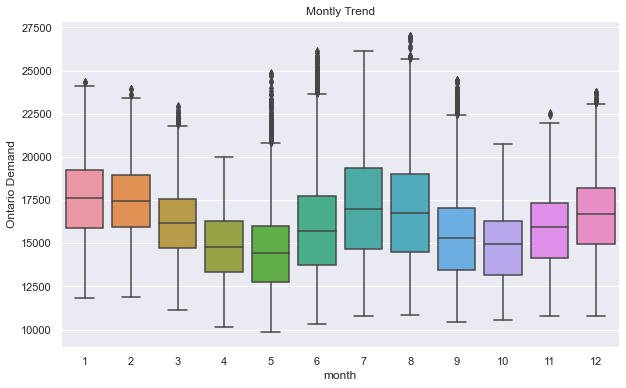

In [37]:
# boxplot for month's count
plt.figure(figsize=(10,6))

sns.boxplot(x=complete_data['month'], y=complete_data['Ontario Demand'], )
plt.title('Montly Trend')
plt.show()

- As expected electrcity demand is higher in January and February
- Also July and August experience increase in Electrcity demand


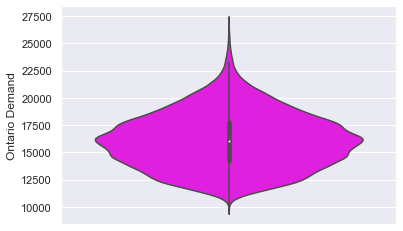

In [38]:
sns.violinplot(complete_data['Ontario Demand'], orient='vertical', color='magenta')

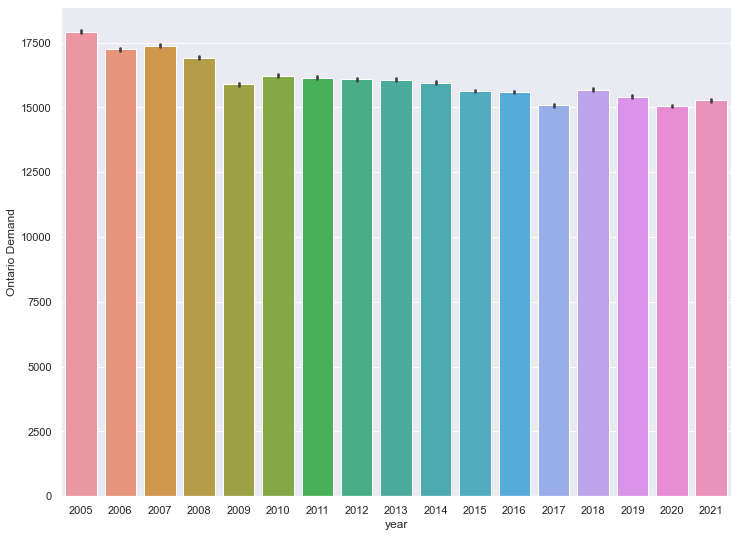

In [39]:
plt.figure(figsize=(12,9))
sns.barplot(data=complete_data, x="year", y="Ontario Demand")

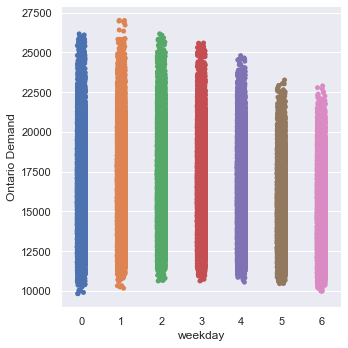

In [40]:
sns.catplot(x="weekday", y="Ontario Demand", kind='strip',data= complete_data);

### Decomposition of timeseries

In [41]:

from statsmodels.tsa.seasonal import seasonal_decompose

decomposed_series = seasonal_decompose(complete_data['Ontario Demand'],freq=8760)

<Figure size 864x576 with 0 Axes>

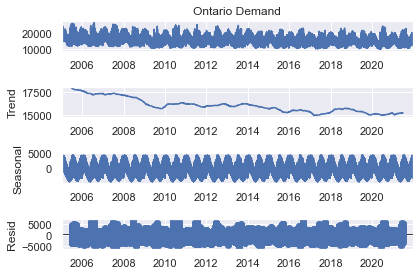

In [42]:
plt.figure(figsize=(12,8))
decomposed_series.plot()
plt.show()

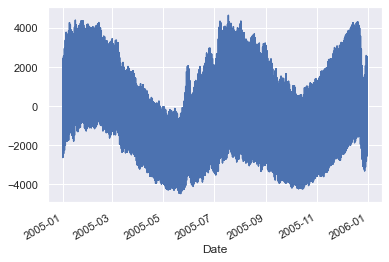

In [43]:
(decomposed_series.seasonal[0:8760]).plot()

In [56]:
# Extracting yearly demand data
yearly_demand = pd.DataFrame(complete_data.groupby('year')['Ontario Demand'].sum())
yearly_demand


,Ontario Demand
year,
2005,156971620
2006,151054281
2007,152205637
2008,148675912
2009,139165604
2010,142194821
2011,141470780
2012,141287714
2013,140736784


In [63]:
yearly_demand.to_csv("yearly_demand.csv", sep=',',index=True)

In [64]:
complete_data.shape

(149016, 11)

## Time Series Cross Validation

In [65]:
from sklearn.model_selection import TimeSeriesSplit

In [66]:
time_series_cv = TimeSeriesSplit(n_splits=10)
print(time_series_cv)

TimeSeriesSplit(max_train_size=None, n_splits=10)


In [67]:
for train_index, test_index in time_series_cv.split(complete_data):
    print('----- ----- ----')
    print("TRAIN:", train_index[0], 'to', train_index[-1])
    print("TEST:", test_index[0], 'to', test_index[-1])

----- ----- ----
TRAIN: 0 to 13555
TEST: 13556 to 27101
----- ----- ----
TRAIN: 0 to 27101
TEST: 27102 to 40647
----- ----- ----
TRAIN: 0 to 40647
TEST: 40648 to 54193
----- ----- ----
TRAIN: 0 to 54193
TEST: 54194 to 67739
----- ----- ----
TRAIN: 0 to 67739
TEST: 67740 to 81285
----- ----- ----
TRAIN: 0 to 81285
TEST: 81286 to 94831
----- ----- ----
TRAIN: 0 to 94831
TEST: 94832 to 108377
----- ----- ----
TRAIN: 0 to 108377
TEST: 108378 to 121923
----- ----- ----
TRAIN: 0 to 121923
TEST: 121924 to 135469
----- ----- ----
TRAIN: 0 to 135469
TEST: 135470 to 149015


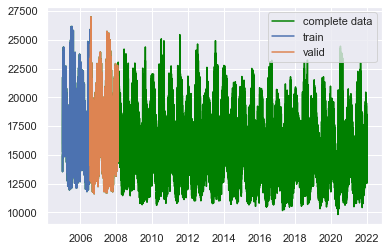

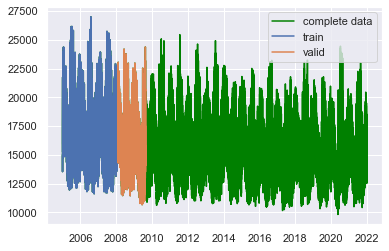

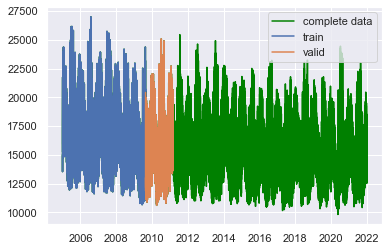

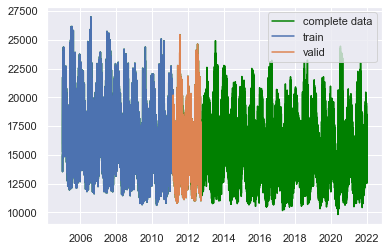

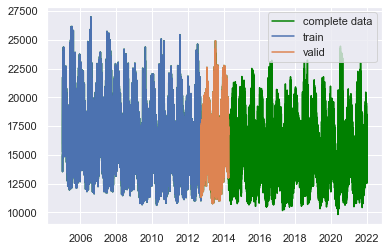

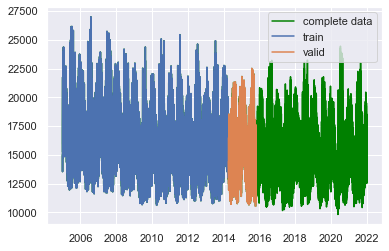

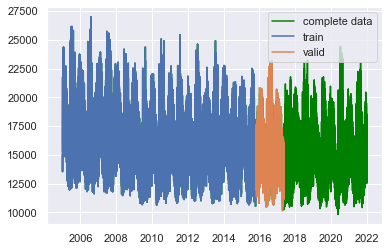

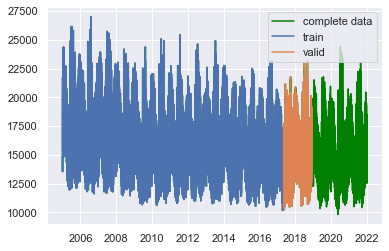

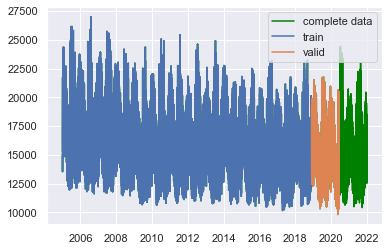

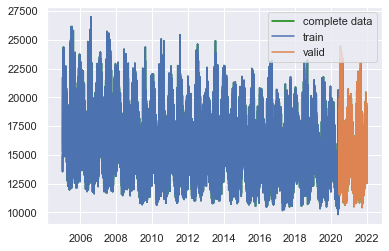

In [71]:
plt.figure(figsize=(6,4))

for train_index, test_index in time_series_cv.split(complete_data):
    plt.plot(complete_data.index, complete_data['Ontario Demand'], label='complete data', color='green')

    plt.plot(complete_data[train_index[0]:train_index[-1]].index, complete_data['Ontario Demand'][train_index[0]:train_index[-1]],label='train')
    plt.plot(complete_data[test_index[0]:test_index[-1]].index, complete_data['Ontario Demand'][test_index[0]:test_index[-1]],label='valid')
    
    plt.legend(loc='best')
    plt.show()

In [69]:
### Converting complete data to csv
# complete_data.to_csv("complete_data.csv", sep=',',index=True)


## Linear Regression

In [72]:
from sklearn.linear_model import LinearRegression

### Creating train and valid sets

In [73]:
model = LinearRegression(normalize=True)

In [98]:
# Create a new dataframe out of complet data
ontario_demand = pd.DataFrame(complete_data[['Date','Ontario Demand']])
ontario_demand.dtypes
print(ontario_demand.head())
complete_data.head()

                 Date  Ontario Demand
Date                                 
2005-01-01 2005-01-01           15016
2005-01-01 2005-01-01           14470
2005-01-01 2005-01-01           14015
2005-01-01 2005-01-01           13622
2005-01-01 2005-01-01           13545


,Date,Hour,Market Demand,Ontario Demand,year,month,day,dayofyear,week,weekday,quarter
Date,,,,,,,,,,,
2005-01-01,2005-01-01,1,16672,15016,2005,1,1,1,53,5,1
2005-01-01,2005-01-01,2,16262,14470,2005,1,1,1,53,5,1
2005-01-01,2005-01-01,3,16043,14015,2005,1,1,1,53,5,1
2005-01-01,2005-01-01,4,15192,13622,2005,1,1,1,53,5,1
2005-01-01,2005-01-01,5,14911,13545,2005,1,1,1,53,5,1


In [106]:
i = 0
for train, test in time_series_cv.split(ontario_demand):
    print('----- ----- ----')
    print("TRAIN:", train[0], 'to', train[-1])
    print("TEST:", test[0], 'to', test[-1])
    
    x_train = (complete_data[train[0]:train[-1]]).drop(complete_data[1], #axis=1)
    y_train = (complete_data[train[0]:train[-1]]['Ontario Demand'])
    
    x_valid = (complete_data[test[0]:test[-1]]).drop(complete_data[1], #axis=1)
    y_valid = (complete_data[test[0]:test[-1]]['Ontario Demand'])
    
    print('Model training on set', i+1)
    model.fit(x_train,y_train)
    preds_valid = model.predict(x_valid)
    rmse = sqrt(mean_squared_error(y_valid, preds_valid))
    print('The RMSE value is', rmse)
    i=i+1

SyntaxError: invalid syntax (<ipython-input-106-7ed6794ae792>, line 10)